# Ejercicios de repaso de Pandas

En este notebook vamos a repasar algunos conceptos de Pandas. Este notebook está vacío, pero viene acompanhado de otro notebook con todas las soluciones.

**Es extremadamente importante evitar consultar las soluciones hasta que no hayas terminado los ejercicios en este notebook**. Las soluciones pueden parecer sencillas cuando las ves, pero sacarlas por uno mismo puede ser mucho más difícil. **Por favor, solo consulta las soluciones si no puedes avanzar después de varios intentos**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Datos

Los datos se encuentran en el directorio `data`. Se trata de un fichero CSV, usando comas como separador, y con los nombres de las columnas en la primera fila.

*Puedes intentar usar la shell antes para comprobar cómo es el fichero*.

**Ejercicio:** Usa la shell antes de cargar el CSV para comprobar cómo de grande es. **Es posible cargar todo el fichero en memoria?**

In [2]:
! pwd

/home/dsc/Repos/MasterDataScience/04_Pandas


In [3]:
% cd /home/dsc/Data
! ls -ls

/home/dsc/Data
total 60
 4 drwxr-x--- 2 dsc dsc  4096 mar 13  2018 airline_tickets
 4 drwxr-x--- 2 dsc dsc  4096 feb  2 12:40 challenge
 4 drwx------ 2 dsc dsc  4096 ene 25 11:30 challenge2
 4 drwxr-x--- 2 dsc dsc  4096 feb  6 12:45 opentraveldata
 4 -rwxr-x--- 1 dsc dsc   102 mar 13  2018 README.md
 4 drwxr-x--- 9 dsc dsc  4096 ene  8 16:56 shell
 4 drwxr-x--- 4 dsc dsc  4096 mar 13  2018 us_dot
32 -rw-r--r-- 1 dsc dsc 31904 feb  1 17:12 weather_year.csv


## El dataframe

**Ejercicio**: Cuántas filas tiene el dataframe? Y cuántas columnas?

*Solución*: 366 filas y 23 columnas

In [4]:
df = pd.read_csv('weather_year.csv')
df.shape

(366, 23)

In [5]:
df.head()

,EDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2012-3-10,56,40,24,24,20,16,74,50,26,...,10,10,10,13,6,17.0,0.00,0,NaN,138
1,2012-3-11,67,49,30,43,31,24,78,53,28,...,10,10,10,22,7,32.0,T,1,Rain,163
2,2012-3-12,71,62,53,59,55,43,90,76,61,...,10,10,6,24,14,36.0,0.03,6,Rain,190
3,2012-3-13,76,63,50,57,53,47,93,66,38,...,10,10,4,16,5,24.0,0.00,0,NaN,242
4,2012-3-14,80,62,44,58,52,43,93,68,42,...,10,10,10,16,6,22.0,0.00,0,NaN,202


## Transformar los datos

Los datos de la columna EDT parecen ser fechas, pero sin embargo no se han leído como fechas al cargar el data frame.

**Ejercicio**: Comprueba de qué tipo son los datos incluidos en la columna EDT. **Vuelve a leer el dataframe (sobre-escribiendo la variable d) para que los datos sea lean como una fecha**.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 23 columns):
EDT                           366 non-null object
Max TemperatureF              366 non-null int64
Mean TemperatureF             366 non-null int64
Min TemperatureF              366 non-null int64
Max Dew PointF                366 non-null int64
MeanDew PointF                366 non-null int64
Min DewpointF                 366 non-null int64
Max Humidity                  366 non-null int64
 Mean Humidity                366 non-null int64
 Min Humidity                 366 non-null int64
 Max Sea Level PressureIn     366 non-null float64
 Mean Sea Level PressureIn    366 non-null float64
 Min Sea Level PressureIn     366 non-null float64
 Max VisibilityMiles          366 non-null int64
 Mean VisibilityMiles         366 non-null int64
 Min VisibilityMiles          366 non-null int64
 Max Wind SpeedMPH            366 non-null int64
 Mean Wind SpeedMPH           366 non-null int64
 Max G

Para comprobar que los datos se han leído correctamente como una fecha, obtén el año, mes y semana (semana dentro del año, de 1 a 52) de la fecha que está en la cuarta fila en la columna EDT

*Solución*: 2012, 3 y 13

In [7]:
df['EDT'] = pd.to_datetime(df['EDT'])

In [8]:
df.loc[3,'EDT'].year,df.loc[3,'EDT'].month,df.loc[3,'EDT'].day

(2012, 3, 13)

## Renombrar columnas

Vamos a cambiar los nombres de todas las columnas para que sea más sencillo manejarlas

In [9]:
df.columns

Index(['EDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
       'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn',
       ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn',
       ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles',
       ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH',
       'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees'],
      dtype='object')

In [10]:
df.columns = ['date', 'maxT_F', 'meanT_F', 'minT_F',
       'maxDewPoint_F', 'meanDewPoint_F', 'minDewPoint_F', 'maxHum',
       'meanHum', 'minHum', 'maxSeaLevelPress_In',
       'meanSeaLevelPress_In', 'minSeaLevelPress_In',
       'maxVis_Mil', 'meanVis_Mil', 'minVis_Mil',
       'maxWindSpeed_MPH', 'meanWindSpeed_MPH', 'minWindSpeed_MPH',
       'Precip_In', 'CloudCover', 'Events', 'WindDirDegrees']

In [11]:
df.head()

,date,maxT_F,meanT_F,minT_F,maxDewPoint_F,meanDewPoint_F,minDewPoint_F,maxHum,meanHum,minHum,...,maxVis_Mil,meanVis_Mil,minVis_Mil,maxWindSpeed_MPH,meanWindSpeed_MPH,minWindSpeed_MPH,Precip_In,CloudCover,Events,WindDirDegrees
0,2012-03-10,56,40,24,24,20,16,74,50,26,...,10,10,10,13,6,17.0,0.00,0,NaN,138
1,2012-03-11,67,49,30,43,31,24,78,53,28,...,10,10,10,22,7,32.0,T,1,Rain,163
2,2012-03-12,71,62,53,59,55,43,90,76,61,...,10,10,6,24,14,36.0,0.03,6,Rain,190
3,2012-03-13,76,63,50,57,53,47,93,66,38,...,10,10,4,16,5,24.0,0.00,0,NaN,242
4,2012-03-14,80,62,44,58,52,43,93,68,42,...,10,10,10,16,6,22.0,0.00,0,NaN,202


## Propiedades de las columnas

Obtén la media, desviación estándar, mínimo y máximo, y los cuartiles de la columna mean_temp

Hay un método para dataframes y columnas de dataframes (series) que te permite obtener todos esos valores de una vez. **Puedes encontrar qué método es?**

*Solución*:
mean      55.683060
std       18.436506
min       11.000000
25%       41.000000
50%       59.000000
75%       70.750000
max       89.000000

In [12]:
df['meanT_F'].describe()

count    366.000000
mean      55.683060
std       18.436506
min       11.000000
25%       41.000000
50%       59.000000
75%       70.750000
max       89.000000
Name: meanT_F, dtype: float64

Ahora vamos a dibujar la evolución de mean_temp.

Extrae la columna mean_temp e intenta usar el método plot sobre ella

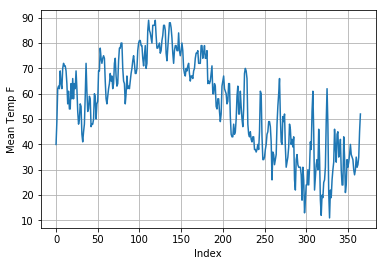

In [13]:
plt.plot(df['meanT_F'])
plt.grid(True)
plt.xlabel('Index')
plt.ylabel('Mean Temp F');

En el eje horizontal se incluye el 'indice de la serie, que en este caso es un número autocorrelativo.

Vamos a sustituir el 'indice del dataframe por la columna date, de manera que ahora la fecha sea el 'indice, y por tanto se dibuje en el eje horizontal.

In [14]:
df.set_index(df['date'],inplace=True)

Comprueba que ahora al dibujar la columna mean_temp, en el eje horizontal vemos la fecha en vez del 'indice autocorrelativo

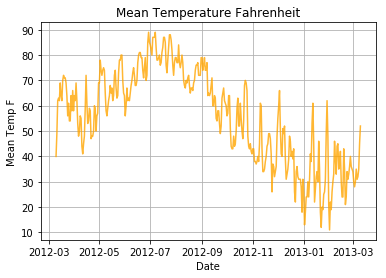

In [15]:
plt.plot(df['meanT_F'],'orange',alpha = 0.8)
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Mean Temp F')
plt.title('Mean Temperature Fahrenheit');

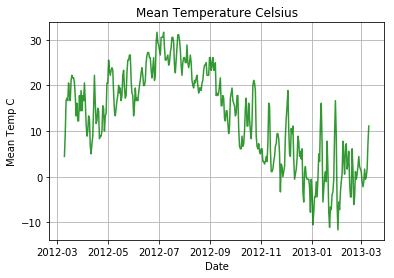

In [16]:
plt.plot(((df['meanT_F']-32)*(5 / 9)) ,'green',alpha = 0.8)
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Mean Temp C')
plt.title('Mean Temperature Celsius');

Sin embargo, ahora el dataframe tiene a la vez el índice y la columna date con los mismos valores. La columna date es redundante. **Podrías eliminarla?**

Ten cuidado, porque al eliminar una columna no actúas sobre el dataframe, sino que obtienes una copia del dataframe con la columna eliminada. No necesitamos el dataframe original, así que sobreescribe d con el nuevo dataframe sin la columna date.

In [17]:
df = df.drop(columns='date')
df.head()

,maxT_F,meanT_F,minT_F,maxDewPoint_F,meanDewPoint_F,minDewPoint_F,maxHum,meanHum,minHum,maxSeaLevelPress_In,...,maxVis_Mil,meanVis_Mil,minVis_Mil,maxWindSpeed_MPH,meanWindSpeed_MPH,minWindSpeed_MPH,Precip_In,CloudCover,Events,WindDirDegrees
date,,,,,,,,,,,,,,,,,,,,,
2012-03-10,56,40,24,24,20,16,74,50,26,30.53,...,10,10,10,13,6,17.0,0.00,0,NaN,138
2012-03-11,67,49,30,43,31,24,78,53,28,30.37,...,10,10,10,22,7,32.0,T,1,Rain,163
2012-03-12,71,62,53,59,55,43,90,76,61,30.13,...,10,10,6,24,14,36.0,0.03,6,Rain,190
2012-03-13,76,63,50,57,53,47,93,66,38,30.12,...,10,10,4,16,5,24.0,0.00,0,NaN,242
2012-03-14,80,62,44,58,52,43,93,68,42,30.15,...,10,10,10,16,6,22.0,0.00,0,NaN,202


Al usar plot, obtenemos un gráfico de la serie temporal de la columna mean_temp. Vamos ahora a dibujar un histograma de esta columna, usando hist en vez de plot. **Intenta entender cuál es la diferencia entre ambos gráficos. Por qué ya no aparece la fecha en el gráfico? Qué valores se muestran en cada uno de los ejes?**

**En qué situaciones es útil un histograma?**

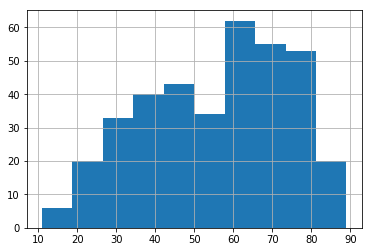

In [18]:
df['meanT_F'].hist();

Los valores de la temperatura estan en grados Farenheit, unas unidades que son difíciles de interpretar para la mayoría de nosotros.

Vamos a crear una columna mean_tempC que contenga los valores de mean_temp, pero transformados a grados centígrados, más fáciles de interpretar para nosotros. Para ello haremos uso de la función definida en la siguiente celda:

In [19]:
def F_to_C(x):
    return (x-32)*(5/9)

Usa la función para crear la columna adicional con los valores en grados centígrados (grados Celsius), de nombre **mean_tempC**

In [20]:
df['meanT_F'].head()

date
2012-03-10    40
2012-03-11    49
2012-03-12    62
2012-03-13    63
2012-03-14    62
Name: meanT_F, dtype: int64

In [21]:
df['meanT_C'] = df['meanT_F'].apply(F_to_C)
df['meanT_C'].head()

date
2012-03-10     4.444444
2012-03-11     9.444444
2012-03-12    16.666667
2012-03-13    17.222222
2012-03-14    16.666667
Name: meanT_C, dtype: float64

In [22]:
df['meanT_F'].map(F_to_C).head()

date
2012-03-10     4.444444
2012-03-11     9.444444
2012-03-12    16.666667
2012-03-13    17.222222
2012-03-14    16.666667
Name: meanT_F, dtype: float64

Dibuja ahora la serie temporal con esta nueva columna, usando plot. Incluye una rejilla (grid) en el gráfico para que sea más fácil de leer e interpretar

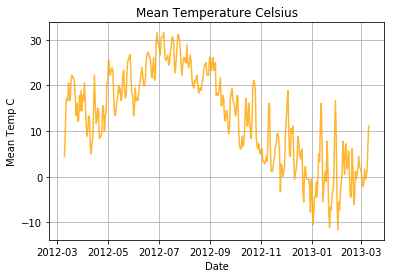

In [23]:
plt.plot(df['meanT_C'],'orange',alpha = 0.8)
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Mean Temp C')
plt.title('Mean Temperature Celsius');

Dibuja ahora también un histograma de esta nueva columna. **Cuál es el rango de temperaturas más frecuente en los datos?**

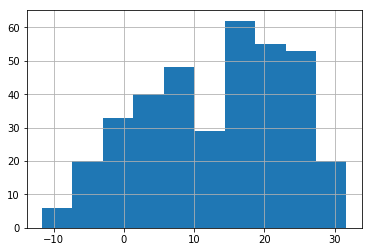

In [24]:
df['meanT_C'].hist();

Como se puede ver en ambos gráficos, hay algunos días con temperaturas bajo 0.

**En qué día ocurrió la temperatura más baja? Cuál fue la temperatura media ese día?**

**Cuántos días de temperaturas bajo cero hay en los datos?**

*Solución: El 1 de febrero de 2013 con -11.67 C, 44 d'ias

In [25]:
df.describe()

,maxT_F,meanT_F,minT_F,maxDewPoint_F,meanDewPoint_F,minDewPoint_F,maxHum,meanHum,minHum,maxSeaLevelPress_In,...,minSeaLevelPress_In,maxVis_Mil,meanVis_Mil,minVis_Mil,maxWindSpeed_MPH,meanWindSpeed_MPH,minWindSpeed_MPH,CloudCover,WindDirDegrees,meanT_C
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,366.000000,366.000000,366.000000
mean,66.803279,55.683060,44.101093,49.549180,44.057377,37.980874,90.027322,67.860656,45.193989,30.108907,...,29.936831,9.994536,8.732240,5.797814,16.418033,6.057377,22.764384,2.885246,189.704918,13.157256
std,20.361247,18.436506,17.301141,16.397178,16.829996,17.479449,9.108438,9.945591,15.360261,0.172189,...,0.182476,0.073821,1.875406,3.792219,5.564329,3.200940,8.131092,2.707261,94.045080,10.242503
min,16.000000,11.000000,1.000000,0.000000,-3.000000,-5.000000,54.000000,37.000000,15.000000,29.640000,...,29.230000,9.000000,2.000000,0.000000,6.000000,0.000000,7.000000,0.000000,1.000000,-11.666667
25%,51.000000,41.000000,30.000000,36.000000,30.000000,24.000000,85.000000,61.250000,35.000000,29.990000,...,29.830000,10.000000,8.000000,2.000000,13.000000,4.000000,17.000000,0.000000,131.000000,5.000000
50%,69.000000,59.000000,47.000000,54.500000,48.000000,41.000000,93.000000,68.000000,42.000000,30.100000,...,29.940000,10.000000,10.000000,6.000000,16.000000,6.000000,22.000000,2.000000,192.500000,15.000000
75%,84.000000,70.750000,57.750000,62.000000,57.000000,51.000000,96.000000,74.000000,54.000000,30.210000,...,30.040000,10.000000,10.000000,10.000000,20.000000,8.000000,26.000000,5.000000,259.750000,21.527778
max,106.000000,89.000000,77.000000,77.000000,72.000000,71.000000,100.000000,95.000000,90.000000,30.600000,...,30.440000,10.000000,10.000000,10.000000,39.000000,19.000000,63.000000,8.000000,360.000000,31.666667


In [26]:
df['meanT_C'][df['meanT_C'] == min(df['meanT_C'])]

date
2013-02-01   -11.666667
Name: meanT_C, dtype: float64

In [27]:
# 1 ºF = -17.2222 ºC

df['minT_F'][df['minT_F'] == min(df['minT_F'])]

date
2013-01-02    1
Name: minT_F, dtype: int64

In [28]:
df.loc['2013-01-02',['minT_F','maxT_F','meanT_F']]

minT_F      1
maxT_F     25
meanT_F    13
Name: 2013-01-02 00:00:00, dtype: object

In [29]:
len(df[df['meanT_C'] < 0])

44

En el dataframe tenemos también las columnas min_temp y max_temp, que están también en grados Farenheit.

Crea dos columnas nuevas min_tempC y max_tempC, que contengan las temperaturas en grados centígrados. Recuerda que tienes la función f2c disponible.

In [30]:
df['minT_C'] = df['minT_F'].apply(lambda x: F_to_C(x))
df['maxT_C'] = df['maxT_F'].apply(lambda x: F_to_C(x))

Dibuja las series temporales de min_tempC, mean_tempC y max_tempC en una misma gráfica con tres curvas de diferentes columnas y leyenda. Añade una rejilla (grid) al gr'afico.

*Pista*: Si tienes un dataframe con la fecha en el índice y solo esas tres columnas, puedes usar el método plot del dataframe para obtener justo ese gráfico. Intenta extraer solo las tres columnas del dataframe d

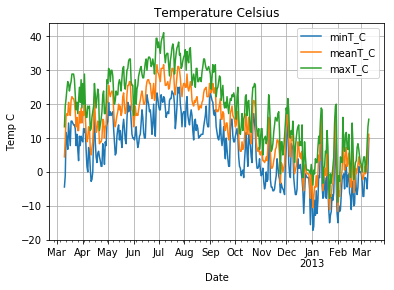

In [31]:
df[['minT_C','meanT_C','maxT_C']].plot()
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Temp C')
plt.title('Temperature Celsius');

La columna precipitation contiene la cantidad de lluvias diarias. Pero tenemos un problema, no todos los datos son numéricos. Obtén los primeros diez valores de la columna precipitation y comprueba si existe algún valor no numérico. **Que valor no numérico has encontrado?**

*Solución*: Hay valores que contienen T

In [32]:
# Hay 36 valores T

df['Precip_In'].value_counts().head()

0.00    215
T        36
0.01     16
0.03      9
0.02      7
Name: Precip_In, dtype: int64

Además, el resto de datos de la columna se han interpretado como texto. **Usa la siguiente función para crear una columna de nombre precipitationN que contendrá los valores numéricos**.

Lo que vamos a hacer es transformar en un número si encontramos un valor numérico, y en el caso de que encontremos T, el valor correspondiente será 0.00. El valor T significa que en ese día hubo trazas de lluvia. Es decir, llovió, pero muy poco, y no ha quedado registrado el volumen de precipitación.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2012-03-10 to 2013-03-10
Data columns (total 25 columns):
maxT_F                  366 non-null int64
meanT_F                 366 non-null int64
minT_F                  366 non-null int64
maxDewPoint_F           366 non-null int64
meanDewPoint_F          366 non-null int64
minDewPoint_F           366 non-null int64
maxHum                  366 non-null int64
meanHum                 366 non-null int64
minHum                  366 non-null int64
maxSeaLevelPress_In     366 non-null float64
meanSeaLevelPress_In    366 non-null float64
minSeaLevelPress_In     366 non-null float64
maxVis_Mil              366 non-null int64
meanVis_Mil             366 non-null int64
minVis_Mil              366 non-null int64
maxWindSpeed_MPH        366 non-null int64
meanWindSpeed_MPH       366 non-null int64
minWindSpeed_MPH        365 non-null float64
Precip_In               366 non-null object
CloudCover              366 non-null int64
Events 

In [34]:
def fun(x):
    if x == 'T':
        return 0
    else:
        return float(x)

In [35]:
df['Precip_In'] = df['Precip_In'].apply(fun)
df['Precip_In'].head()

date
2012-03-10    0.00
2012-03-11    0.00
2012-03-12    0.03
2012-03-13    0.00
2012-03-14    0.00
Name: Precip_In, dtype: float64

Desde este momento, vamos a trabajar solo con las siguientes columnas:
* min_tempC
* mean_tempC
* max_tempC
* precipitationN

El índice del dataframe lo vamos a conservar también, para tener las fechas para dibujar diversos gráficos.

**Crea un dataframe de nombre w que contenga solo esas columnas, pero que conserve el índice de d**

In [36]:
df2 = df[['minT_C','meanT_C','maxT_C','Precip_In']]
df2.head()

,minT_C,meanT_C,maxT_C,Precip_In
date,,,,
2012-03-10,-4.444444,4.444444,13.333333,0.00
2012-03-11,-1.111111,9.444444,19.444444,0.00
2012-03-12,11.666667,16.666667,21.666667,0.03
2012-03-13,10.000000,17.222222,24.444444,0.00
2012-03-14,6.666667,16.666667,26.666667,0.00


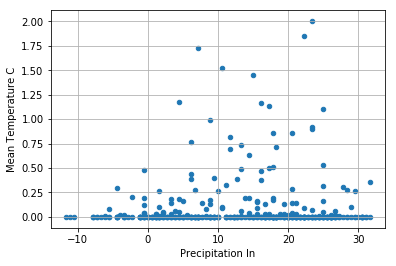

In [41]:
df2.plot.scatter(x='meanT_C',y='Precip_In')
plt.xlabel('Precipitation In')
plt.ylabel('Mean Temperature C')
plt.grid(True);

A modo de ejemplo, vemos cómo realizar una nube de puntos relacionando precipitación con la temperatura media.

Existen muchos gráficos que se pueden hacer directamente con Pandas y sus Series y Dataframes. Para más información, consulta la documentación en http://pandas.pydata.org/pandas-docs/stable/visualization.html

**Llovió algún día en los que la temperatura media era menor que 0?**

*Solución*: Sí, algunos puntos con temperaturas negativas tienen precipitaciones positivas.